# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [4]:
! git clone https://github.com/pwy7fv/linearRegression

fatal: destination path 'linearRegression' already exists and is not an empty directory.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Q1**

In [9]:
data = pd.read_csv('linearRegression/04_hedonic_pricing/cars_hw.csv')
datas = data
data.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [10]:
print(data[['Price', 'Color', 'Seating_Capacity', 'Body_Type', 'Make', 'Make_Year', 'Mileage_Run', 'Fuel_Type', 'Transmission', 'Transmission_Type']].isnull().sum())

Price                0
Color                0
Seating_Capacity     0
Body_Type            0
Make                 0
Make_Year            0
Mileage_Run          0
Fuel_Type            0
Transmission         0
Transmission_Type    0
dtype: int64


In [11]:
print(data.dtypes)

Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object


<Axes: >

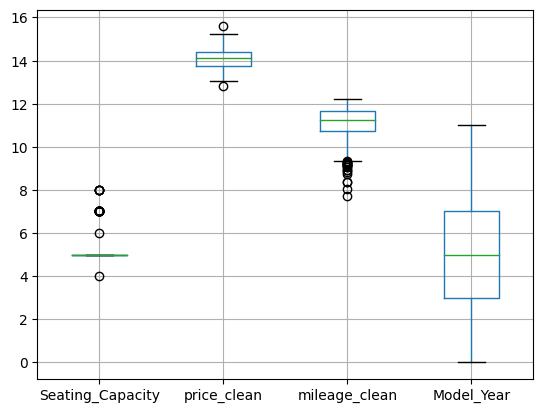

In [12]:
data['price_clean'] = np.arcsinh(data['Price'])
data['mileage_clean'] = np.arcsinh(data['Mileage_Run'])
data['Model_Year'] = max(data['Make_Year'])-data['Make_Year']
data = data.drop(['Price','Mileage_Run','Make_Year','Unnamed: 0'],axis=1)
data.boxplot()

**Q2**

In [26]:
data.describe()

,Seating_Capacity,price_clean,mileage_clean,Model_Year
count,976.000000,976.000000,976.000000,976.000000
mean,5.095287,14.104181,11.109435,5.036885
std,0.446224,0.450276,0.733389,2.818742
min,4.000000,12.837344,7.711549,0.000000
25%,5.000000,13.765795,10.722241,3.000000
50%,5.000000,14.102942,11.227119,5.000000
75%,5.000000,14.384228,11.651317,7.000000
max,8.000000,15.587407,12.201010,11.000000


<Axes: xlabel='price_clean', ylabel='Count'>

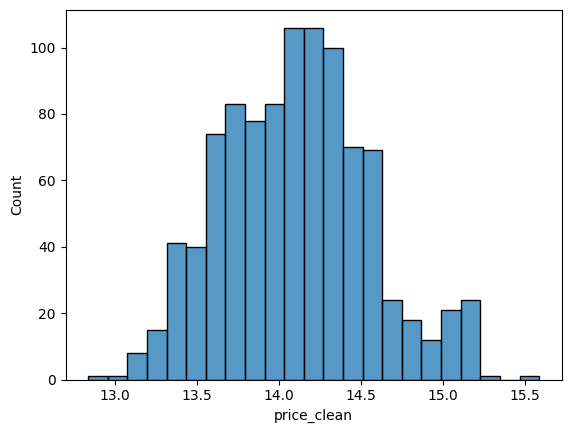

In [15]:
sns.histplot(data['price_clean'])

<Axes: xlabel='mileage_clean', ylabel='price_clean'>

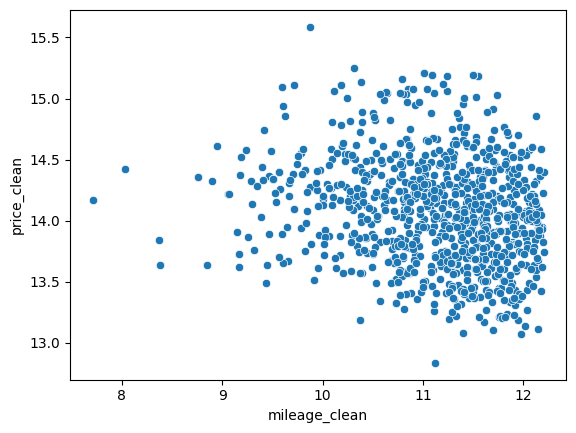

In [23]:
sns.scatterplot(data=data,x='mileage_clean',y='price_clean')

,count,mean,std,min,25%,50%,75%,max
Model_Year,,,,,,,,
0,14.0,14.304841,0.191712,13.890618,14.183222,14.338315,14.413309,14.609408
1,69.0,14.324515,0.430591,13.617060,13.981025,14.305317,14.534325,15.250595
2,135.0,14.483166,0.475340,13.489780,14.204845,14.488455,14.884350,15.211260
3,124.0,14.261282,0.401302,13.569610,14.019542,14.301633,14.466252,15.587407
4,112.0,14.209615,0.296872,13.458836,14.082391,14.239470,14.418733,14.723769
5,137.0,14.163859,0.344957,13.304685,13.979329,14.151983,14.340239,15.008827
6,92.0,14.089004,0.303213,13.369223,13.936333,14.071701,14.305612,14.603058
7,85.0,13.962418,0.348046,13.077366,13.764217,13.991143,14.137594,14.744520
8,73.0,13.825933,0.267471,13.195614,13.673947,13.785051,13.994493,14.770252


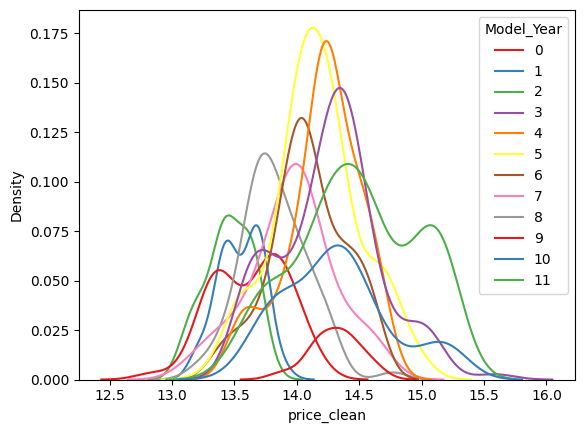

In [33]:
sns.kdeplot(data = data, x='price_clean',hue='Model_Year',palette='Set1')
data['price_clean'].groupby(data['Model_Year']).describe()

**Q3**

In [39]:
N = data.shape[0]
data = data.sample(frac=1, random_state=100)
train_size = int(.8*N)

data_train = data[0:train_size]
y_train = data_train['mileage_clean']

data_test = data[train_size:]
y_test = data_test['mileage_clean']

**Q4**

In [48]:
from sklearn import linear_model

var_1 = ['Model_Year','price_clean']
X_train_1 = data_train.loc[:,var_1]
reg_1 = linear_model.LinearRegression().fit(X_train_1,y_train)
X_test_1 = data_test.loc[:,var_1]
y_hat = reg_1.predict(X_test_1)
print(reg_1.score(X_test_1,y_test))
rmse_1 = np.sqrt(np.mean( (y_test - y_hat)**2 ))
print(rmse_1)

0.44773175603019577
0.5231123498159403


In [44]:
var_2 = ['Make','Body_Type','Fuel_Type','Transmission','Transmission_Type']

dummies = pd.DataFrame([])
for var in var_2:
    new_dummies = pd.get_dummies( data.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)
    X_train_2 = dummies.iloc[0:train_size,:]
    X_test_2 = dummies.iloc[train_size:,:]

reg_2 = linear_model.LinearRegression().fit(X_train_2,y_train)
y_hat_2 = reg_2.predict(X_test_2)
print(reg_2.score(X_test_2,y_test))
rmse_2 = np.sqrt( np.mean( (y_test - y_hat_2)**2 ))
print(rmse_2)

0.2265357638548895
0.6190704238320376


The numeric model does better. It have a higher R2 and a lower RSME. I believe it is because the year of a car probably is going to go hand in hand with how much mileage it gets as opposed to the other categorical variables.

**Q5**

In [49]:
X_train_3 = pd.concat([X_train_1, X_train_2],axis=1, ignore_index=True)
X_test_3 = pd.concat([X_test_1, X_test_2],axis=1, ignore_index=True)

reg_3 = linear_model.LinearRegression().fit(X_train_3,y_train)
y_hat_3 = reg_3.predict(X_test_3)
print(reg_3.score(X_test_3,y_test))
rmse_3 = np.sqrt( np.mean( (y_test - y_hat_3)**2 ))
print(rmse_3)

0.5100630574450828
0.49270847342762486


When the two models are combined the R2 and RMSE are better, but it is still not the best model, becasue the R2 is 0.52 and the RSME is 0.49.

**Q6**



I learned that sometimes less is better or you might not have the correct variables to predict another. It is clear that the year of the car is truly the only good predictor out of all these variables.